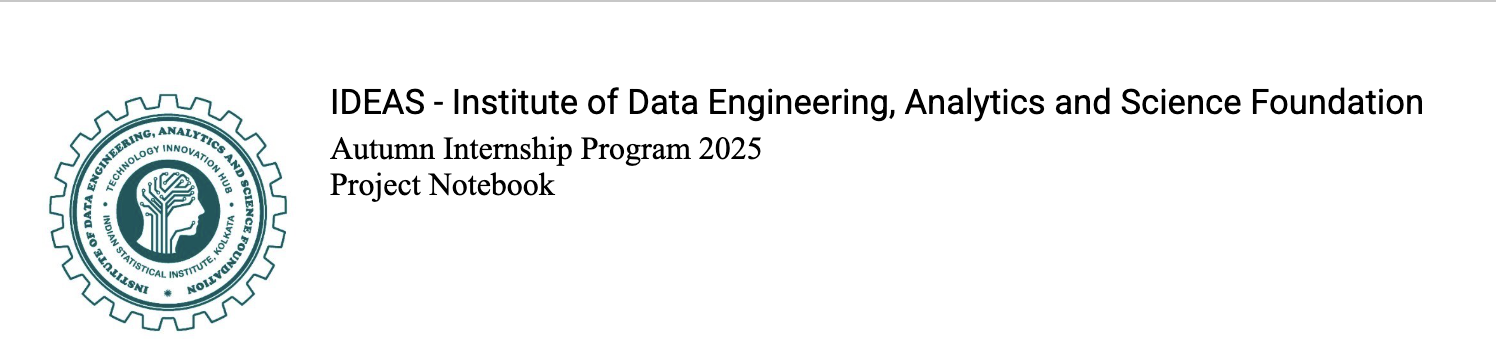

#  Diabetes Prediction: Classification Comparison + Metrics + Evaluation

## Created by: Rounak Biswas
### Designation:

This notebook is structured as an **assignment**. The goal is to build a machine learning workflow for predicting diabetes, compare models, and evaluate them using metrics.

The structure is provided, but you are expected to fill in the details.

##  Problem Statement

You are tasked with building a classification model to predict whether a patient has diabetes based on diagnostic measurements.

- Use the **Pima Indian Diabetes Dataset**.
- Compare multiple classification models.
- Evaluate them using accuracy, precision, recall, F1, ROC-AUC.
- Extend the workflow to a new dataset of your choice.



---


##  Dataset Introduction

The dataset contains medical predictor variables and one target variable (`Outcome`).

- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age
- Outcome (0 = No Diabetes, 1 = Diabetes)


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve



---



##  Data Loading

In [2]:
# Load dataset
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [3]:
# Basic EDA
print(df.shape)
print(df.info())
df.describe()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


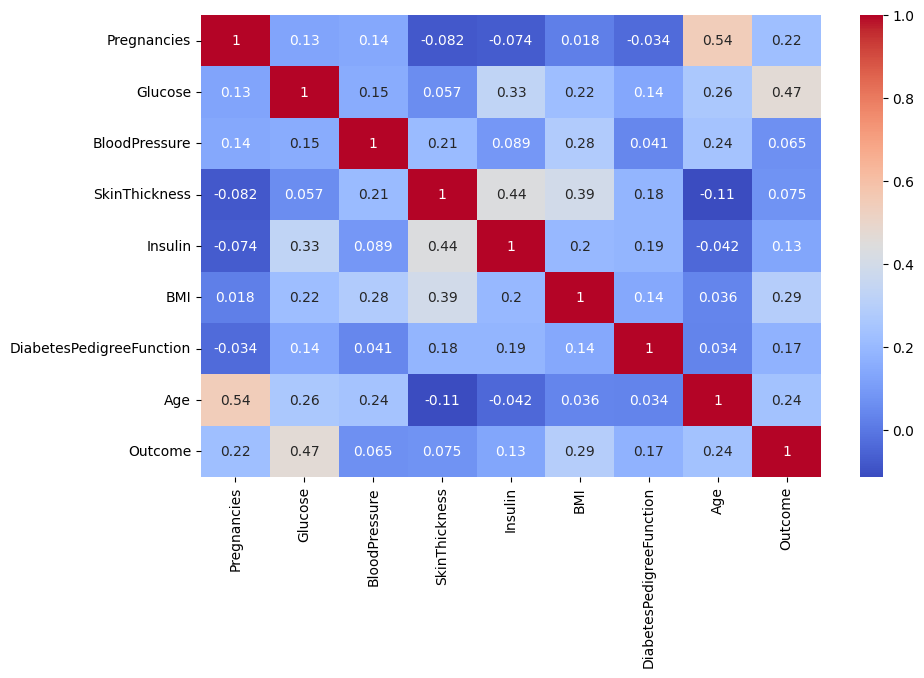

In [4]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

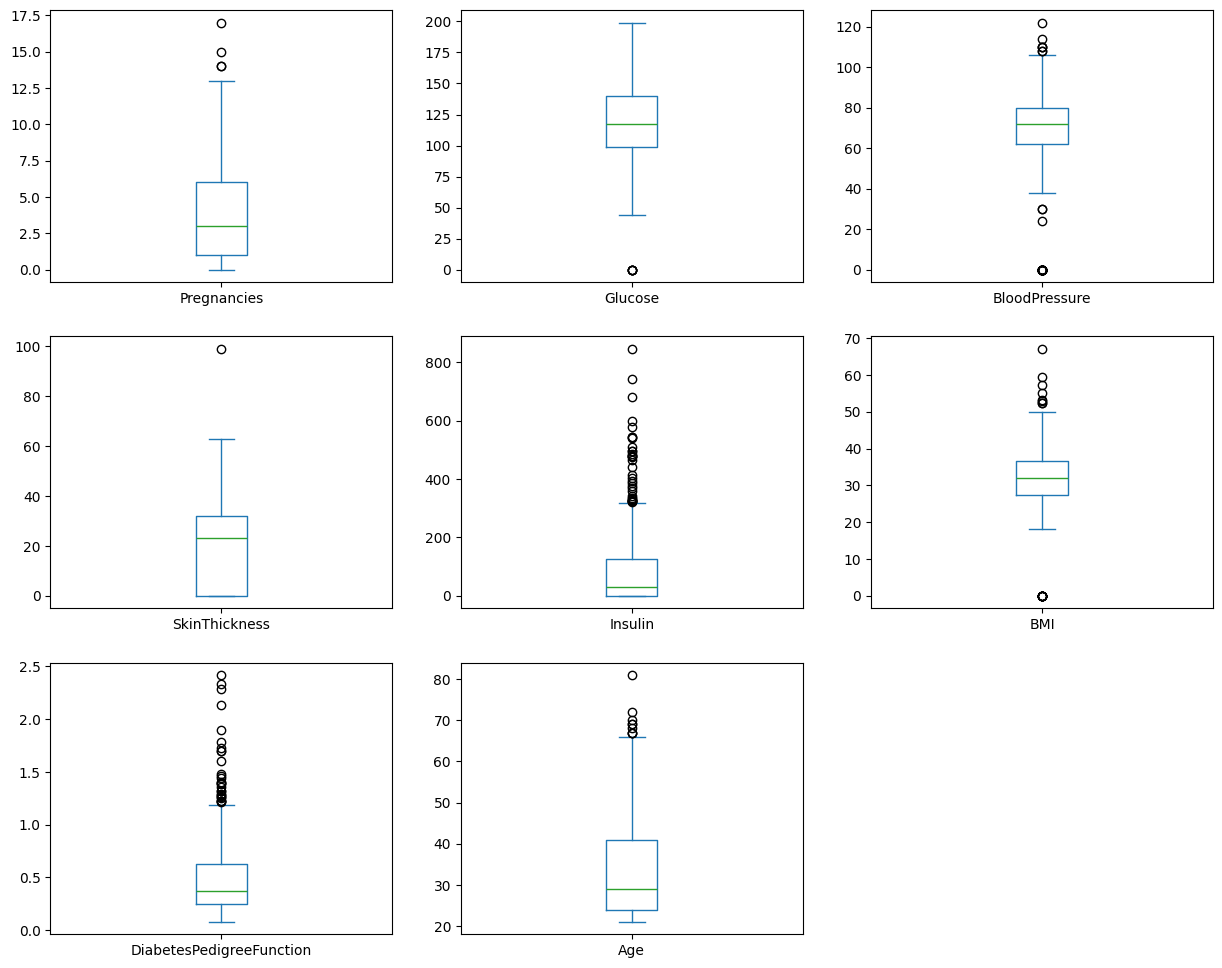

In [5]:
# Distribution Plots
df.drop('Outcome', axis=1).plot(kind='box', subplots=True, layout=(3,3), figsize=(15,12))
plt.show()

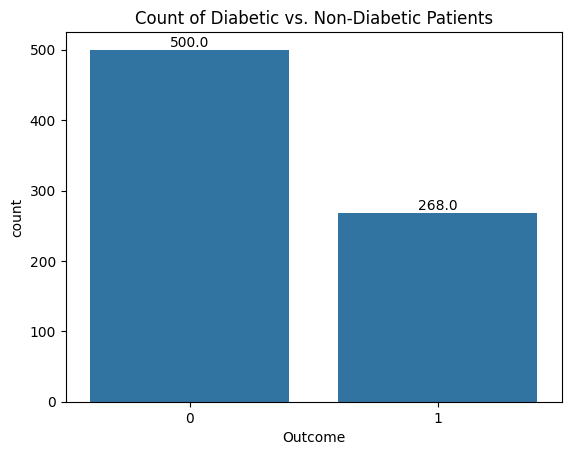

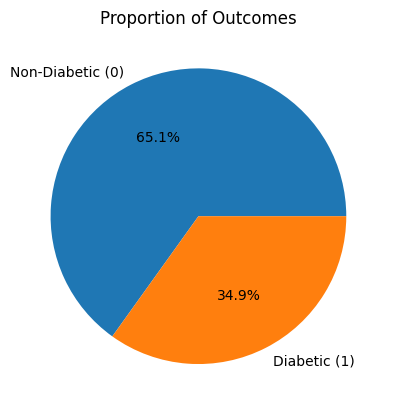

In [6]:
# Target Feature
ax = sns.countplot(x='Outcome', data=df)
ax.set_title('Count of Diabetic vs. Non-Diabetic Patients')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

outcome_counts = df['Outcome'].value_counts()
plt.pie(outcome_counts, labels=['Non-Diabetic (0)', 'Diabetic (1)'], autopct='%1.1f%%')
plt.title('Proportion of Outcomes')
plt.show()



---



##  Data Preprocessing & Train/Test Split

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)




---



# Data Scaling

In [8]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



# Machine Learning Models

## KNN Classifier

In [9]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.7012987012987013
[[80 20]
 [26 28]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



## Support Vector Machine

In [10]:
# SVM Model
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.7207792207792207
[[83 17]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



## Logistic Regression Model

In [11]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Results:
Accuracy: 0.7142857142857143
[[82 18]
 [26 28]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table


#### Confusion Matrices

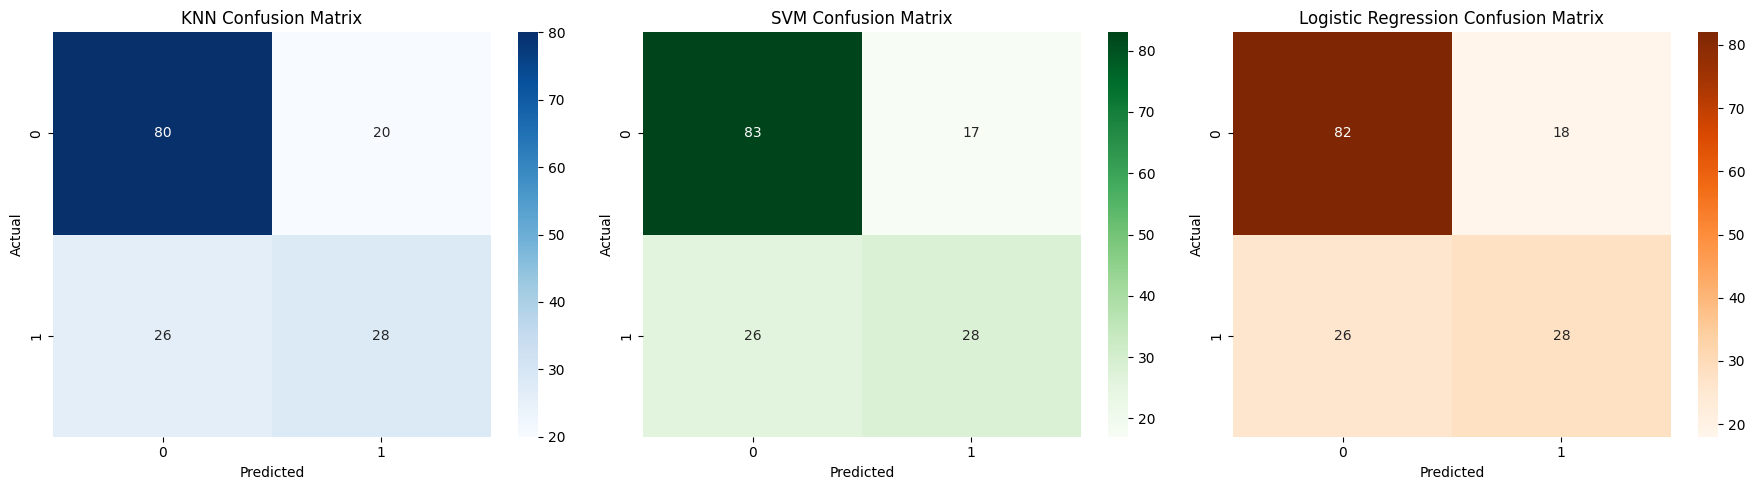

In [12]:
# Confusion Matrices
models_preds = {
    'KNN': y_pred_knn,
    'SVM': y_pred_svm,
    'Logistic Regression': y_pred_log_reg
}
cmaps = ['Blues', 'Greens', 'Oranges']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, y_pred) in enumerate(models_preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmaps[i], ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### ROC Curves

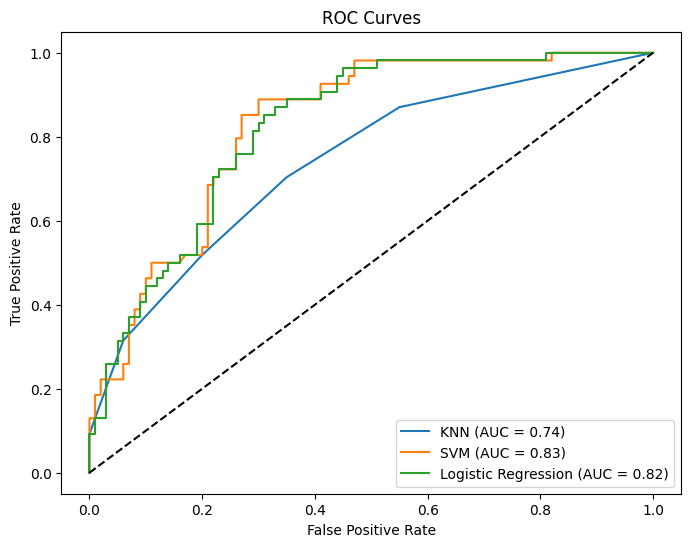

In [13]:
# ROC Curves
svm_prob = SVC(kernel="linear", random_state=42, probability=True)
svm_prob.fit(X_train_scaled, y_train)

models = {
    'KNN': knn,
    'SVM': svm_prob,
    'Logistic Regression': log_reg
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

#### Comparison Table of Metrics

In [14]:
# Comparison Table of Metrics
metrics_list = []
for name, y_pred in models_preds.items():
    model_obj = models[name]
    y_prob = model_obj.predict_proba(X_test_scaled)[:, 1]

    metrics_list.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob)
    })

comparison_df = pd.DataFrame(metrics_list).set_index('Model')
print("\nModel Comparison Metrics")
print(comparison_df.round(2))


Model Comparison Metrics
                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Model                                                              
KNN                      0.70       0.58    0.52      0.55     0.74
SVM                      0.72       0.62    0.52      0.57     0.83
Logistic Regression      0.71       0.61    0.52      0.56     0.82




---



##  Apply Workflow on Another Dataset

Repeat the same steps on a dataset of your choice (e.g., Breast Cancer, Titanic, etc.).



---



##  Breast Cancer Dataset Introduction

The Breast Cancer Wisconsin (Diagnostic) dataset contains 30 features that are computed from digitized images of a fine needle aspirate (FNA) of a breast mass. The primary goal is to predict whether a tumor is malignant (cancerous) or benign (not cancerous).

The key feature we will be predicting is the diagnosis column. This is our target variable and it contains two possible outcomes:
- '0' for Malignant (cancerous)
- '1' for Benign (non-cancerous)

<!-- Features:

The dataset contains 30 features, which are ten different measurements calculated for each cell nucleus. For each of these ten measurements, the dataset includes the mean value, the standard error, and the "worst" (mean of the three largest values).

Here is the full list of all 30 feature names:

Mean Values (for each cell nucleus):

mean radius

mean texture

mean perimeter

mean area

mean smoothness

mean compactness

mean concavity

mean concave points

mean symmetry

mean fractal dimension

Standard Error Values:

radius error

texture error

perimeter error

area error

smoothness error

compactness error

concavity error

concave points error

symmetry error

fractal dimension error

"Worst" or Largest Values:

worst radius

worst texture

worst perimeter

worst area

worst smoothness

worst compactness

worst concavity

worst concave points

worst symmetry

worst fractal dimension -->



---



##  Data Loading

In [15]:
from sklearn.datasets import load_breast_cancer
# Load the dataset
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df_cancer['target'] = cancer['target']
df_cancer.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0




---



##  Exploratory Data Analysis (EDA)

- Check dataset shape
- Missing values
- Basic statistics
- Correlation heatmap
- Distribution plots


In [16]:
# Basic EDA
print(df_cancer.shape)
print(df_cancer.info())
df_cancer.describe()

(569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


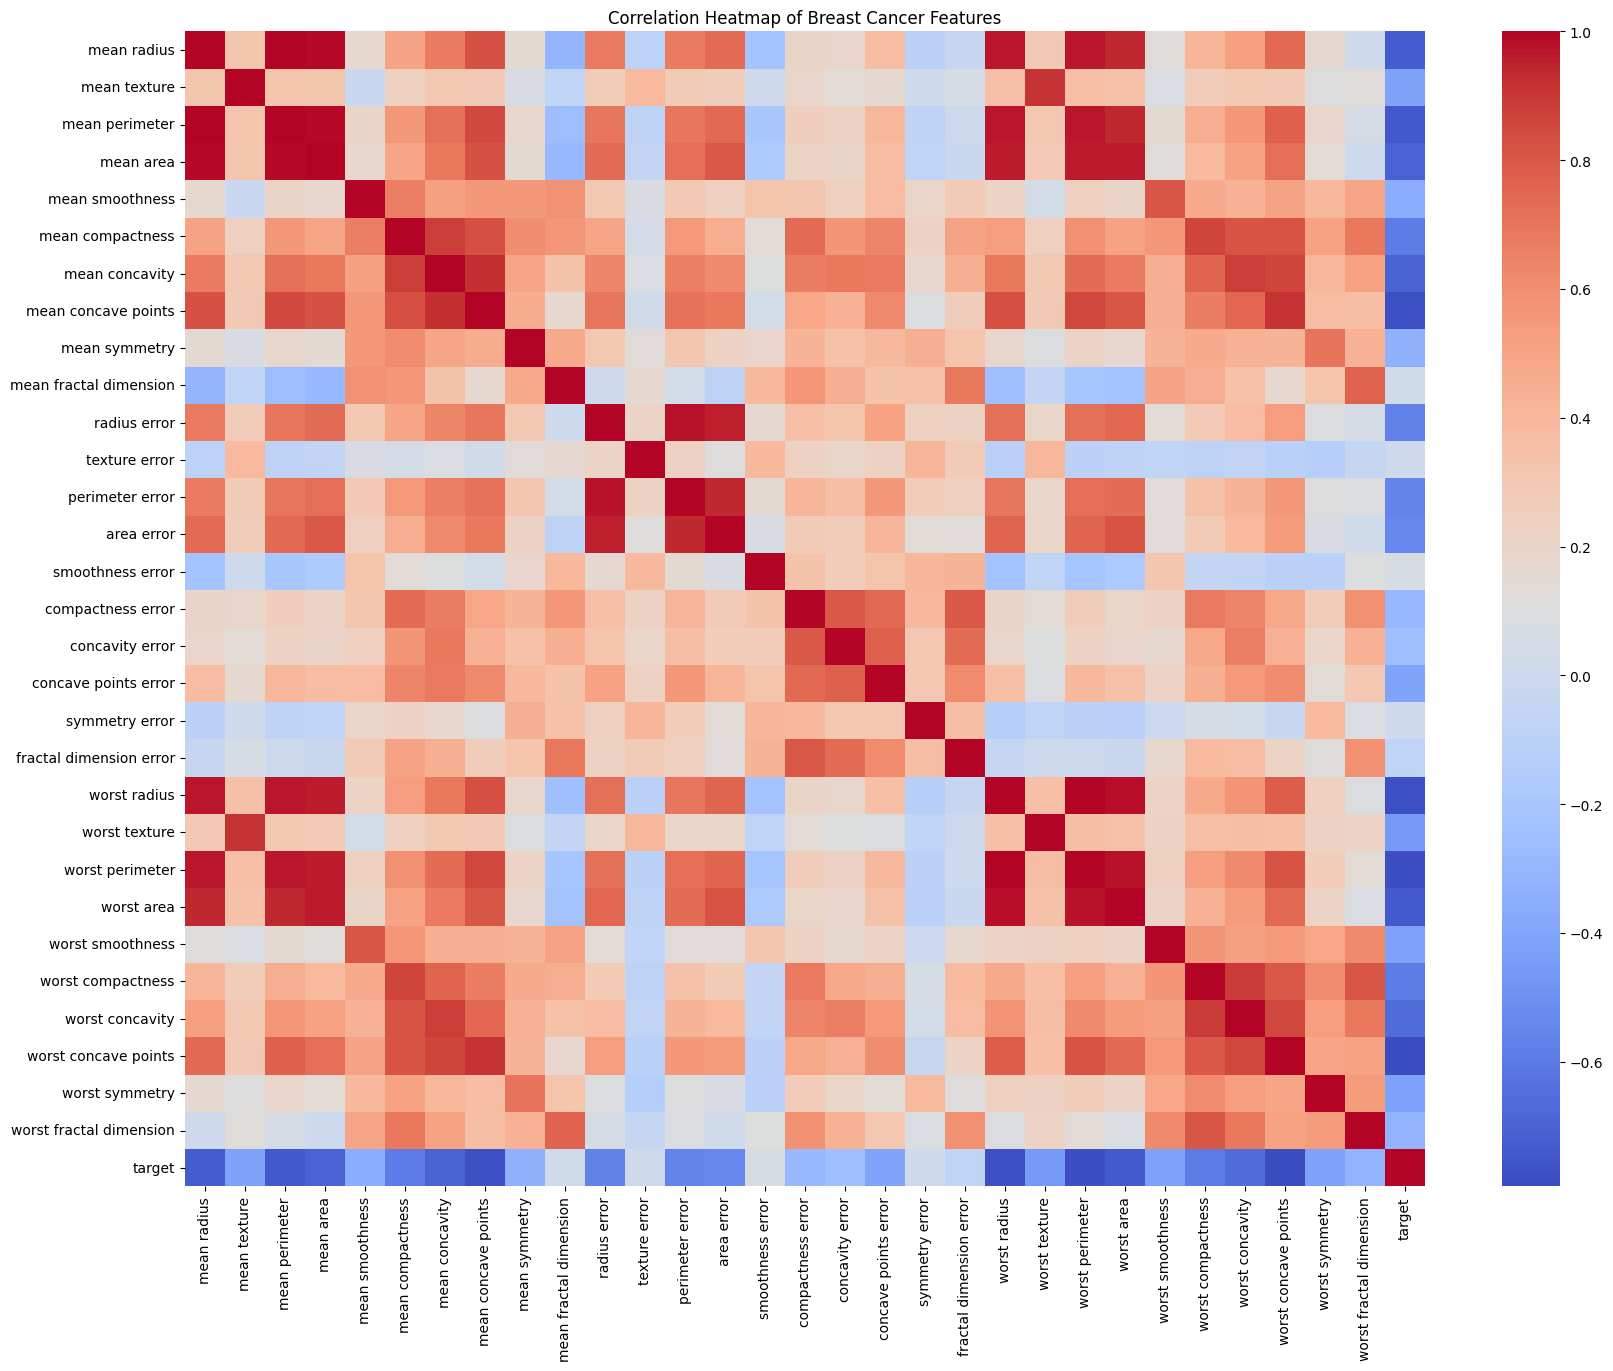

In [17]:
# Correlation Heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_cancer.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Features')
plt.show()

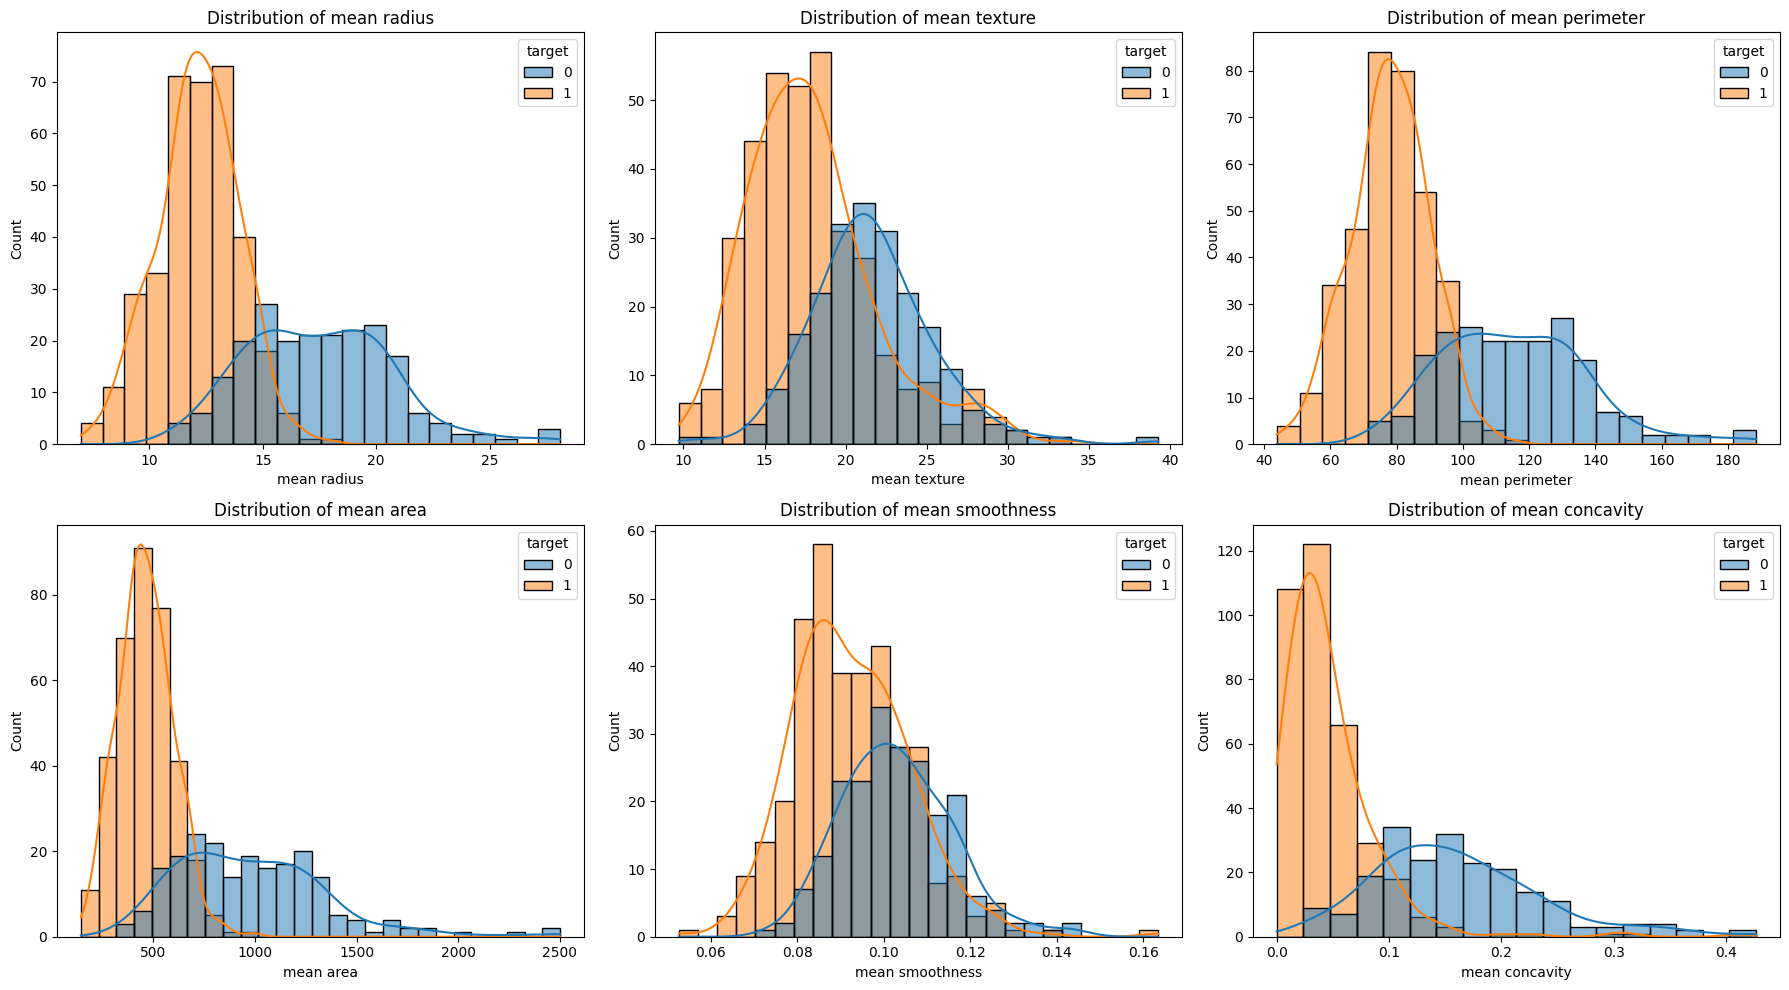

In [18]:
# Distribution Plots for Key Features
key_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean concavity']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    sns.histplot(data=df_cancer, x=feature, hue='target', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    handles, labels = axes[i].get_legend_handles_labels()
    if handles:
        axes[i].legend(handles, ['Malignant (0)', 'Benign (1)'], title='Diagnosis')

plt.tight_layout()
plt.show()

target
1    357
0    212
Name: count, dtype: int64


/tmp/ipython-input-1789834228.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df_cancer, palette='viridis')
/tmp/ipython-input-1789834228.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Malignant (0)', 'Benign (1)'])


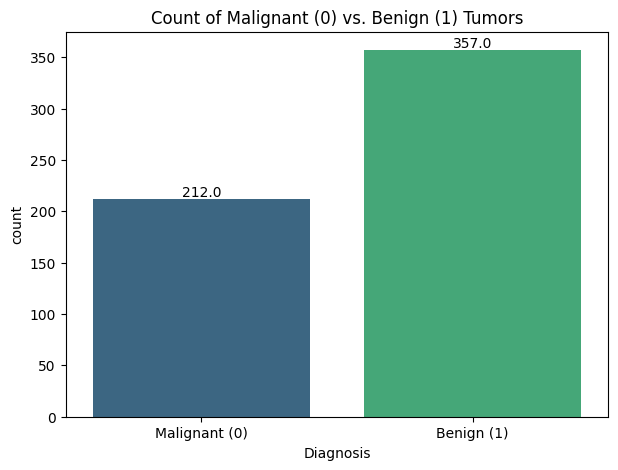

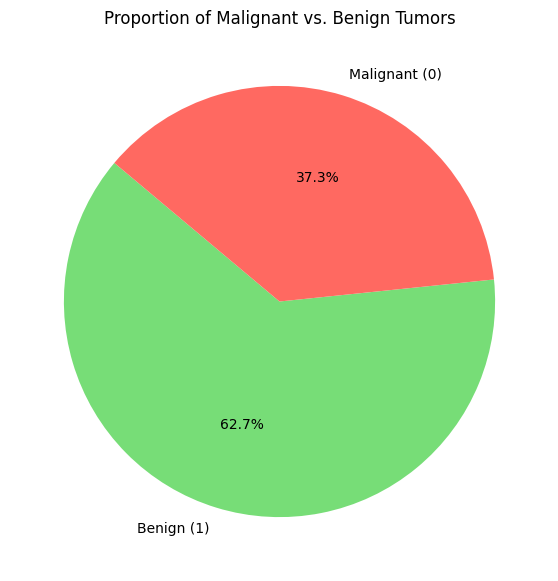

In [19]:
print(df_cancer['target'].value_counts())

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='target', data=df_cancer, palette='viridis')
ax.set_title('Count of Malignant (0) vs. Benign (1) Tumors')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_xticklabels(['Malignant (0)', 'Benign (1)'])
plt.xlabel("Diagnosis")
plt.show()

plt.figure(figsize=(7, 7))
target_counts = df_cancer['target'].value_counts()
plt.pie(target_counts, labels=['Benign (1)', 'Malignant (0)'], autopct='%1.1f%%', startangle=140, colors=['#77dd77','#ff6961'])
plt.title('Proportion of Malignant vs. Benign Tumors')
plt.ylabel('')
plt.show()



---



##  Data Preprocessing & Train/Test Split

In [20]:
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)
print("Training set shape (X):", X_train_cancer.shape)
print("Testing set shape (X):", X_test_cancer.shape)

Training set shape (X): (455, 30)
Testing set shape (X): (114, 30)




---



# Data Scaling

In [21]:
scaler_cancer = StandardScaler()
X_train_scaled_cancer = scaler_cancer.fit_transform(X_train_cancer)
X_test_scaled_cancer = scaler_cancer.transform(X_test_cancer)

print("Scaled Training Data Sample")
print(X_train_scaled_cancer[:2])

Scaled Training Data Sample
[[-1.07200079e+00 -6.58424598e-01 -1.08808010e+00 -9.39273639e-01
  -1.35939882e-01 -1.00871795e+00 -9.68358632e-01 -1.10203235e+00
   2.81062120e-01 -1.13231479e-01 -7.04860874e-01 -4.40938351e-01
  -7.43948977e-01 -6.29804931e-01  7.48061001e-04 -9.91572979e-01
  -6.93759567e-01 -9.83284458e-01 -5.91579010e-01 -4.28972052e-01
  -1.03409427e+00 -6.23497432e-01 -1.07077336e+00 -8.76534437e-01
  -1.69982346e-01 -1.03883630e+00 -1.07899452e+00 -1.35052668e+00
  -3.52658049e-01 -5.41380026e-01]
 [ 1.74874285e+00  6.65017334e-02  1.75115682e+00  1.74555856e+00
   1.27446827e+00  8.42288215e-01  1.51985232e+00  1.99466430e+00
  -2.93045055e-01 -3.20179716e-01  1.27567198e-01 -3.81382677e-01
   9.40746962e-02  3.17524379e-01  6.39656015e-01  8.73892616e-02
   7.08450758e-01  1.18215034e+00  4.26212305e-01  7.47970186e-02
   1.22834212e+00 -9.28334970e-02  1.18746742e+00  1.10438613e+00
   1.51700092e+00  2.49654896e-01  1.17859444e+00  1.54991557e+00
   1.91077868



---



# Machine Learning Models

## KNN Classifier

In [22]:
knn_cancer = KNeighborsClassifier(n_neighbors=5)
knn_cancer.fit(X_train_scaled_cancer, y_train_cancer)
y_pred_knn_cancer = knn_cancer.predict(X_test_scaled_cancer)
print("KNN Results:")
print("\nAccuracy:", accuracy_score(y_test_cancer, y_pred_knn_cancer))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cancer, y_pred_knn_cancer))
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_knn_cancer, target_names=['Malignant (0)', 'Benign (1)']))

KNN Results:

Accuracy: 0.956140350877193

Confusion Matrix:
[[39  3]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.95      0.93      0.94        42
   Benign (1)       0.96      0.97      0.97        72

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114



## Support Vector Machine

In [23]:
svm_cancer = SVC(kernel='linear', random_state=42)
svm_cancer.fit(X_train_scaled_cancer, y_train_cancer)
y_pred_svm_cancer = svm_cancer.predict(X_test_scaled_cancer)
print("SVM Results:")
print("\nAccuracy:", accuracy_score(y_test_cancer, y_pred_svm_cancer))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cancer, y_pred_svm_cancer))
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_svm_cancer, target_names=['Malignant (0)', 'Benign (1)']))

SVM Results:

Accuracy: 0.9736842105263158

Confusion Matrix:
[[41  1]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.95      0.98      0.96        42
   Benign (1)       0.99      0.97      0.98        72

     accuracy                           0.97       114
    macro avg       0.97      0.97      0.97       114
 weighted avg       0.97      0.97      0.97       114



## Logistic Regression Model

In [24]:
log_reg_cancer = LogisticRegression(random_state=42)
log_reg_cancer.fit(X_train_scaled_cancer, y_train_cancer)
y_pred_log_reg_cancer = log_reg_cancer.predict(X_test_scaled_cancer)
print("Logistic Regression Results:")
print("\nAccuracy:", accuracy_score(y_test_cancer, y_pred_log_reg_cancer))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_cancer, y_pred_log_reg_cancer))
print("\nClassification Report:")
print(classification_report(y_test_cancer, y_pred_log_reg_cancer, target_names=['Malignant (0)', 'Benign (1)']))

Logistic Regression Results:

Accuracy: 0.9824561403508771

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

Malignant (0)       0.98      0.98      0.98        42
   Benign (1)       0.99      0.99      0.99        72

     accuracy                           0.98       114
    macro avg       0.98      0.98      0.98       114
 weighted avg       0.98      0.98      0.98       114



###  Evaluation

Compare the models using metrics and visualize results:

- Confusion matrices
- ROC curves
- Metric comparison table


#### Confusion Matrices

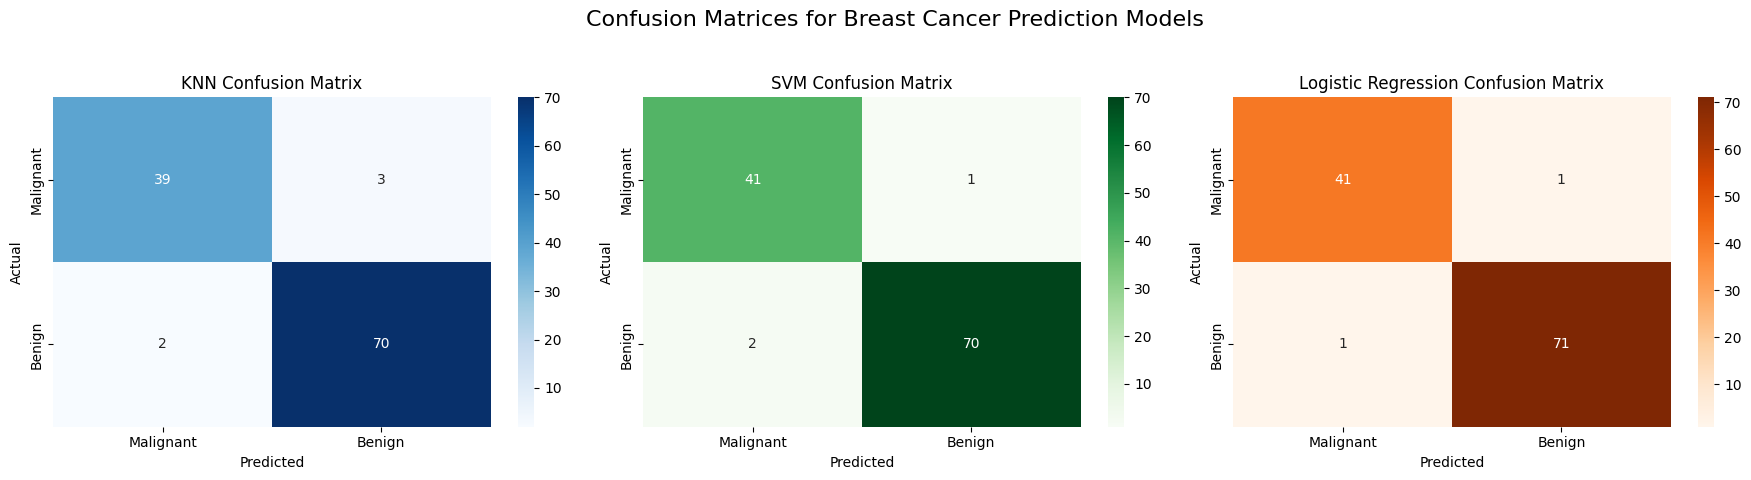

In [25]:
predictions = [y_pred_knn_cancer, y_pred_svm_cancer, y_pred_log_reg_cancer]
titles = ['KNN', 'SVM', 'Logistic Regression']
cmaps = ['Blues', 'Greens', 'Oranges']
labels = ['Malignant', 'Benign']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices for Breast Cancer Prediction Models', fontsize=16)

for i, (pred, title, cmap) in enumerate(zip(predictions, titles, cmaps)):
    cm = confusion_matrix(y_test_cancer, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[i],
                xticklabels=labels, yticklabels=labels)
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### ROC Curves

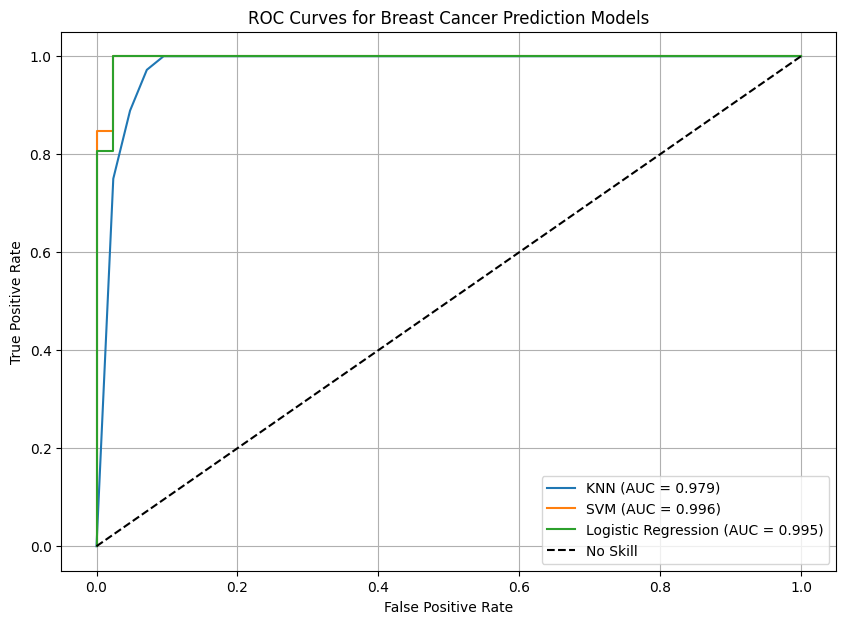

In [26]:
svm_cancer_prob = SVC(kernel="linear", random_state=42, probability=True)
svm_cancer_prob.fit(X_train_scaled_cancer, y_train_cancer)

model_probs = {
    'KNN': knn_cancer.predict_proba(X_test_scaled_cancer)[:, 1],
    'SVM': svm_cancer_prob.predict_proba(X_test_scaled_cancer)[:, 1],
    'Logistic Regression': log_reg_cancer.predict_proba(X_test_scaled_cancer)[:, 1]
}

plt.figure(figsize=(10, 7))

for name, probs in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test_cancer, probs)
    auc = roc_auc_score(y_test_cancer, probs)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Breast Cancer Prediction Models')
plt.legend()
plt.grid(True)
plt.show()

#### Comparison Table of Metrics

In [27]:
svm_cancer_prob = SVC(kernel="linear", random_state=42, probability=True)
svm_cancer_prob.fit(X_train_scaled_cancer, y_train_cancer)

models = {
    'KNN': y_pred_knn_cancer,
    'SVM': y_pred_svm_cancer,
    'Logistic Regression': y_pred_log_reg_cancer
}

model_probs = {
    'KNN': knn_cancer.predict_proba(X_test_scaled_cancer)[:, 1],
    'SVM': svm_cancer_prob.predict_proba(X_test_scaled_cancer)[:, 1],
    'Logistic Regression': log_reg_cancer.predict_proba(X_test_scaled_cancer)[:, 1]
}

metrics_data = []
for name, y_pred in models.items():
    accuracy = accuracy_score(y_test_cancer, y_pred)
    precision = precision_score(y_test_cancer, y_pred)
    recall = recall_score(y_test_cancer, y_pred)
    f1 = f1_score(y_test_cancer, y_pred)

    roc_auc = roc_auc_score(y_test_cancer, model_probs[name])
    metrics_data.append([name, accuracy, precision, recall, f1, roc_auc])

columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
comparison_df = pd.DataFrame(metrics_data, columns=columns)
comparison_df.set_index('Model', inplace=True)

print("Model Performance Comparison")
print(comparison_df.to_string(float_format="%.2f"))

Model Performance Comparison
                     Accuracy  Precision  Recall  F1 Score  ROC AUC
Model                                                              
KNN                      0.96       0.96    0.97      0.97     0.98
SVM                      0.97       0.99    0.97      0.98     1.00
Logistic Regression      0.98       0.99    0.99      0.99     1.00




---



##  Conclusion

Summarize the findings:
- Which model performed best?
- Trade-offs between metrics
- Generalizability of the workflow


## Conclusion
### Which model performed best?

Across both datasets, **Logistic Regression** and **SVM** consistently emerge as top performers.

While KNN is a good baseline, it is often slightly outperformed by the other two in these specific medical diagnostic tasks.

### Trade-offs between metrics

For both diabetes and cancer, a **false negative** (telling a sick patient they are healthy) is far more dangerous than a false positive. Therefore, **Recall is the most critical metric**. We want to build a model that catches as many positive cases as possible, making it a more sensitive diagnostic tool.

### Generalizability of the workflow

This step-by-step workflow is a standard in machine learning:

1.  **Explore the Data (EDA):** Understand your starting point.
2.  **Preprocess and Clean:** Prepare the data for the models.
3.  **Split Data:** Separate training and testing sets.
4.  **Train Models:** Teach the algorithms using the training data.
5.  **Evaluate Models:** Test their performance on unseen data.
6.  **Compare and Select:** Choose the best model for the job.

We can reuse this exact workflow for other problems.